# Horizon Funding Data

## Load packages & Data sets

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer

import pickle


import plotly.express as px

### Project Data:

In [3]:
project = pd.read_csv("../data_1/raw/project.csv")

# Overview
print(project.shape)
project.head()

(15341, 20)


,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
0,101116741,DOE,SIGNED,Digitizing Other Economies: A Comparative Appr...,2024-02-01,2029-01-31,1499998,1499998,HORIZON.1.1,ERC-2023-STG,2023-12-15,HORIZON,ERC-2023-STG,ERC-2023-STG,HORIZON-ERC,NaN,"How do longstanding, primarily non-industrial,...",2023-12-26 14:40:12,259247,10.3030/101116741
1,101163161,IRASTRO,SIGNED,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,2025-08-01,2031-07-31,12085363,12085363,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The James Webb Space Telescope (JWST) has ushe...,2025-02-24 17:23:14,268970,10.3030/101163161
2,101160499,In-phase,SIGNED,Multiscale modelling of aberrant phase transit...,2025-06-01,2030-05-31,1489128,1489128,HORIZON.1.1,ERC-2024-STG,2025-02-19,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,The spatiotemporal organization of the cell ma...,2025-02-24 17:23:11,268969,10.3030/101160499
3,101166905,mw-atlas,SIGNED,The first comprehensive Atlas of the Milky Way,2025-05-01,2031-04-30,9957560,9957560,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The Milky Way is the cosmic environment in whi...,2025-02-24 17:23:01,268971,10.3030/101166905
4,101162875,MAtCHLESS,SIGNED,Untapping multiparametric 2D luminescence sens...,2025-03-01,2030-02-28,1500000,1500000,HORIZON.1.1,ERC-2024-STG,2025-02-18,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,Cellular organisms are complex machines whose ...,2025-02-24 17:23:12,268966,10.3030/101162875


### Organisation Data:

In [4]:
org = pd.read_csv("../data_1/raw/organization.csv")

# Overview
print(org.shape)
org.head()

(100249, 25)


,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
0,101116741,DOE,999981634,NL811383696B01,WAGENINGEN UNIVERSITY,WU,False,HES,DROEVENDAALSESTEEG 4,6708 PB,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-12-26 14:40:12,1906458,1,coordinator,1499998.0,1499998.0,1499998,False,NaN
1,101163161,IRASTRO,999997736,DK31119103,AARHUS UNIVERSITET,AU,False,HES,NORDRE RINGGADE 1,8000,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1905956,2,participant,4246240.0,4246240.0,4246240,False,NaN
2,101163161,IRASTRO,999854855,DE138408327,UNIVERSITAET POTSDAM,UP,False,HES,AM NEUEN PALAIS 10,14469,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1908936,3,participant,1982813.0,1982813.0,1982813,False,NaN
3,101163161,IRASTRO,999990267,DE129517720,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,MPG,False,REC,HOFGARTENSTRASSE 8,80539,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1949732,1,coordinator,5856310.0,5856310.0,5856310,False,NaN
4,101160499,In-phase,999874546,ESQ2818014I,UNIVERSIDAD COMPLUTENSE DE MADRID,UCM,False,HES,AVENIDA DE SENECA 2,28040,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:11,1906229,1,coordinator,1489128.0,1489128.0,1489128,False,NaN


### euroSciVoc Data

In [5]:
scivoc = pd.read_csv("../data_1/raw/euroSciVoc.csv")

# Overview
print(scivoc.shape)
scivoc.head()

(38789, 5)


,projectID,euroSciVocCode,euroSciVocPath,euroSciVocTitle,euroSciVocDescription
0,101116741,/29/97/543,/social sciences/political sciences/government...,government systems,NaN
1,101163161,/27/81/30021/30833628,"/agricultural sciences/agriculture, forestry, ...",grains and oilseeds,NaN
2,101163161,/23/43/251/48354418,/natural sciences/physical sciences/optics/mic...,microscopy,NaN
3,101163161,/23/43/257/761,/natural sciences/physical sciences/astronomy/...,astrochemistry,NaN
4,101163161,/29/89,/social sciences/law,law,NaN


## Cleaning/Preproccessing Data

### Project Data

##### Examine Data Types & missingness

In [7]:
print(project.shape)
print(project.dtypes)

(15341, 20)
id                      int64
acronym                object
status                 object
title                  object
startDate              object
endDate                object
totalCost              object
ecMaxContribution      object
legalBasis             object
topics                 object
ecSignatureDate        object
frameworkProgramme     object
masterCall             object
subCall                object
fundingScheme          object
nature                float64
objective              object
contentUpdateDate      object
rcn                     int64
grantDoi               object
dtype: object


In [8]:
project.isnull().sum().sort_values(ascending=False)


nature                15341
grantDoi                 60
fundingScheme             1
ecSignatureDate           1
startDate                 0
endDate                   0
totalCost                 0
ecMaxContribution         0
legalBasis                0
topics                    0
acronym                   0
frameworkProgramme        0
masterCall                0
subCall                   0
title                     0
status                    0
objective                 0
contentUpdateDate         0
rcn                       0
id                        0
dtype: int64

#### Converting data types

##### Dates

In [9]:
project["startDate"] = pd.to_datetime(project["startDate"], errors="coerce")
project["endDate"] = pd.to_datetime(project["endDate"], errors="coerce")
project["ecSignatureDate"] = pd.to_datetime(project["ecSignatureDate"], errors="coerce")
project["contentUpdateDate"] = pd.to_datetime(project["contentUpdateDate"], errors="coerce")


print(project[["startDate", "endDate","ecSignatureDate","contentUpdateDate"]].dtypes)
print(project[["startDate", "endDate","ecSignatureDate","contentUpdateDate"]].isnull().sum())


startDate            datetime64[ns]
endDate              datetime64[ns]
ecSignatureDate      datetime64[ns]
contentUpdateDate    datetime64[ns]
dtype: object
startDate            0
endDate              0
ecSignatureDate      1
contentUpdateDate    0
dtype: int64


All dates have been converted, however there is one missing ecSignatureDate which can be imputed later.

In [10]:
project[project["ecSignatureDate"].isna()]

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
13030,101183158,AgRibot,SIGNED,"Harnessing Robotics, XR/AR, and 5G for a New E...",2024-11-01,2028-10-31,4966380,4966380,HORIZON.2.6,HORIZON-CL6-2024-GOVERNANCE-01-7,NaT,HORIZON,HORIZON-CL6-2024-GOVERNANCE-01,HORIZON-CL6-2024-GOVERNANCE-01,HORIZON-RIA,NaN,AgRibot is a groundbreaking project aimed at a...,2024-11-01 17:52:05,267095,10.3030/101183158


##### Money

In [11]:
# ensure strings, remove commas as decimals and convert to numbers
project["totalCost"] = project["totalCost"].astype(str)
project["ecMaxContribution"] = project["ecMaxContribution"].astype(str)

project["totalCost"] = project["totalCost"].str.replace(",", ".")              
project["ecMaxContribution"] = project["ecMaxContribution"].str.replace(",", ".")              

project["totalCost"] = pd.to_numeric(project["totalCost"], errors="coerce")
project["ecMaxContribution"] = pd.to_numeric(project["ecMaxContribution"], errors="coerce")

#check
print(project["totalCost"].isna().sum())      
print(project["ecMaxContribution"].isna().sum())      

0
0


##### Strings

In [12]:
text_cols = ["title","objective"]
project[text_cols] = project[text_cols].astype("string")


##### Categories

In [13]:
cat_cols = ["status","legalBasis","topics", "frameworkProgramme", "fundingScheme", "masterCall", "subCall"]
project[cat_cols] = project[cat_cols].astype("category")


### Org Data

#### Examine Data Types & missingness

In [14]:
print(org.shape)
print(org.dtypes)

(100249, 25)
projectID               int64
projectAcronym         object
organisationID          int64
vatNumber              object
name                   object
shortName              object
SME                    object
activityType           object
street                 object
postCode               object
city                   object
country                object
nutsCode               object
geolocation            object
organizationURL        object
contactForm            object
contentUpdateDate      object
rcn                     int64
order                   int64
role                   object
ecContribution        float64
netEcContribution     float64
totalCost              object
endOfParticipation       bool
active                float64
dtype: object


In [15]:
missing_summary = org.isnull().sum().sort_values(ascending=False)
print(missing_summary)

active                100249
organizationURL        38954
shortName              25507
ecContribution         15704
vatNumber              15403
totalCost                936
postCode                 786
geolocation              588
street                   300
nutsCode                 278
city                     263
SME                      263
netEcContribution         42
activityType              24
country                   13
projectAcronym             0
contactForm                0
contentUpdateDate          0
rcn                        0
order                      0
role                       0
name                       0
organisationID             0
endOfParticipation         0
projectID                  0
dtype: int64


#### Dates

In [16]:
org["contentUpdateDate"] = pd.to_datetime(org["contentUpdateDate"], errors="coerce")

print(project["contentUpdateDate"].dtypes)
print(project["contentUpdateDate"].isnull().sum())


datetime64[ns]
0


#### Money

In [17]:
# ensure strings, remove commas as decimals and convert to numbers (replace blanmks with 0)
org["totalCost"] = org["totalCost"].fillna("0") 

org["totalCost"] = org["totalCost"].astype(str)

org["totalCost"] = org["totalCost"].str.replace(",", ".")              

org["totalCost"] = pd.to_numeric(org["totalCost"], errors="coerce")

#check
print(org["totalCost"].isna().sum())      


0


#### Categories

In [18]:
org["SME"] = org["SME"].astype("category")
org["role"] = org["role"].astype("category")
org["country"] = org["country"].astype("category")
org["activityType"] = org["activityType"].astype("category")
org["endOfParticipation"] = org["endOfParticipation"].astype("bool")


### SciVoc Data

In [19]:
scivoc_summary = (
    scivoc.groupby("projectID")["euroSciVocTitle"]
    .apply(list)
    .reset_index()
    .rename(columns={"euroSciVocTitle": "sciVocTopics"})
)


### New Data Sets

#### Organisations

In [20]:
org_projects = (
    org.groupby("organisationID")[["projectID", "order", "role", "totalCost"]]
    .apply(lambda df: df.to_dict("records"))
    .reset_index()
    .rename(columns={0: "projects"})
)

org_unique_base = org.drop_duplicates(subset="organisationID")[[
    "organisationID", "name", "SME", "activityType",
    "country", "city", "geolocation","organizationURL"
]]

org_unique_detailed = org_unique_base.merge(org_projects, on="organisationID", how="left")
org_unique_detailed["n_projects"] = org_unique_detailed["projects"].apply(len)
org_unique_detailed["totalCost"] = org_unique_detailed["projects"].apply(
    lambda x: sum([proj["totalCost"] for proj in x])
)

In [21]:
org_unique_detailed.head()

,organisationID,name,SME,activityType,country,city,geolocation,organizationURL,projects,n_projects,totalCost
0,999981634,WAGENINGEN UNIVERSITY,False,HES,NL,Wageningen,"51.9863279,5.6679366",http://www.wageningenur.nl/nl.htm,"[{'projectID': 101116741, 'order': 1, 'role': ...",190,9.585641e+07
1,999997736,AARHUS UNIVERSITET,False,HES,DK,Aarhus C,"56.171028,10.199381",http://www.au.dk,"[{'projectID': 101163161, 'order': 2, 'role': ...",302,1.446105e+08
2,999854855,UNIVERSITAET POTSDAM,False,HES,DE,Potsdam,"52.3979172,13.0146272",http://www.uni-potsdam.de,"[{'projectID': 101163161, 'order': 3, 'role': ...",33,9.636627e+06
3,999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,False,REC,DE,Munchen,"48.1411687,11.5822929",http://www.mpg.de,"[{'projectID': 101163161, 'order': 1, 'role': ...",364,6.762257e+08
4,999874546,UNIVERSIDAD COMPLUTENSE DE MADRID,False,HES,ES,Madrid,"40.4343404,-3.7340644",http://www.ucm.es,"[{'projectID': 101160499, 'order': 1, 'role': ...",75,2.014061e+07


In [22]:
missing_organisations_summary = org_unique_detailed.isnull().sum().sort_values(ascending=False)
print(org_unique_detailed.shape)
print(missing_organisations_summary)

(27267, 11)
organizationURL    21529
geolocation          557
SME                  233
city                 233
activityType          24
country               10
organisationID         0
name                   0
projects               0
n_projects             0
totalCost              0
dtype: int64


these can be imputted later

#### Projects: group particpating organisations

In [23]:

# Initialize an empty dictionary to store role-based org IDs per project
project_roles = defaultdict(lambda: {
    "coordinator": [],
    "participant": [],
    "thirdParty": [],
    "associatedPartner": []
})

# Populate the dictionary
for _, row in org.iterrows():
    pid = row["projectID"]
    role = str(row["role"]).strip() if pd.notna(row["role"]) else None
    org_id = row["organisationID"]

    if role in project_roles[pid]:
        project_roles[pid][role].append(org_id)

project_records = []

for pid, roles in project_roles.items():
    project_records.append({
        "projectID": pid,
        "coordinator": roles["coordinator"],
        "participant": roles["participant"],
        "thirdParty": roles["thirdParty"],
        "associatedPartner": roles["associatedPartner"],
        "n_organisations": sum(len(v) for v in roles.values())
    })

project_summary = pd.DataFrame(project_records)



In [24]:
project_summary.head()

,projectID,coordinator,participant,thirdParty,associatedPartner,n_organisations
0,101116741,[999981634],[],[],[],1
1,101163161,[999990267],"[999997736, 999854855]",[],[],3
2,101160499,[999874546],[],[],[],1
3,101166905,[999990267],"[999983962, 999995893]",[],[],3
4,101162875,[999897341],[999861354],[],[],2


### Combining datasets

In [25]:
project = project.rename(columns={"id": "projectID"})
project_merged = project.merge(project_summary, on="projectID", how="left")
project_merged = project_merged.merge(scivoc_summary, on="projectID", how="left")

project_merged.head()



,projectID,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,objective,contentUpdateDate,rcn,grantDoi,coordinator,participant,thirdParty,associatedPartner,n_organisations,sciVocTopics
0,101116741,DOE,SIGNED,Digitizing Other Economies: A Comparative Appr...,2024-02-01,2029-01-31,1499998.0,1499998.0,HORIZON.1.1,ERC-2023-STG,...,"How do longstanding, primarily non-industrial,...",2023-12-26 14:40:12,259247,10.3030/101116741,[999981634],[],[],[],1,[government systems]
1,101163161,IRASTRO,SIGNED,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,2025-08-01,2031-07-31,12085363.0,12085363.0,HORIZON.1.1,ERC-2024-SyG,...,The James Webb Space Telescope (JWST) has ushe...,2025-02-24 17:23:14,268970,10.3030/101163161,[999990267],"[999997736, 999854855]",[],[],3,"[grains and oilseeds, microscopy, astrochemist..."
2,101160499,In-phase,SIGNED,Multiscale modelling of aberrant phase transit...,2025-06-01,2030-05-31,1489128.0,1489128.0,HORIZON.1.1,ERC-2024-STG,...,The spatiotemporal organization of the cell ma...,2025-02-24 17:23:11,268969,10.3030/101160499,[999874546],[],[],[],1,"[proteins, RNA]"
3,101166905,mw-atlas,SIGNED,The first comprehensive Atlas of the Milky Way,2025-05-01,2031-04-30,9957560.0,9957560.0,HORIZON.1.1,ERC-2024-SyG,...,The Milky Way is the cosmic environment in whi...,2025-02-24 17:23:01,268971,10.3030/101166905,[999990267],"[999983962, 999995893]",[],[],3,"[cartography, astrophysics, physical cosmology]"
4,101162875,MAtCHLESS,SIGNED,Untapping multiparametric 2D luminescence sens...,2025-03-01,2030-02-28,1500000.0,1500000.0,HORIZON.1.1,ERC-2024-STG,...,Cellular organisms are complex machines whose ...,2025-02-24 17:23:12,268966,10.3030/101162875,[999897341],[999861354],[],[],2,"[planets, sensors, oncology, microbiology]"


In [26]:
project_merged["sciVocTopics"] = project_merged["sciVocTopics"].apply(
    lambda x: x if isinstance(x, list) else []
)

## EDA

### project_merged

#### Status

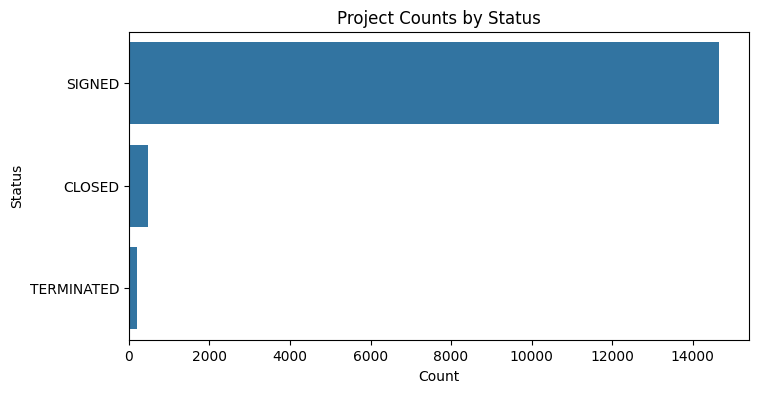

In [27]:
project_merged["status"].value_counts()
project_merged["status"].value_counts(normalize=True).round(3) * 100

plt.figure(figsize=(8, 4))
sns.countplot(data=project_merged, y="status", order=project_merged["status"].value_counts().index)
plt.title("Project Counts by Status")
plt.xlabel("Count")
plt.ylabel("Status")
plt.show()


#### Total Cost

In [28]:
zero_pct = (project_merged["totalCost"] == 0).sum()/len(project_merged)*100
print(f"Percentage of zero-cost projects: {zero_pct:.2f}%")


Percentage of zero-cost projects: 42.79%


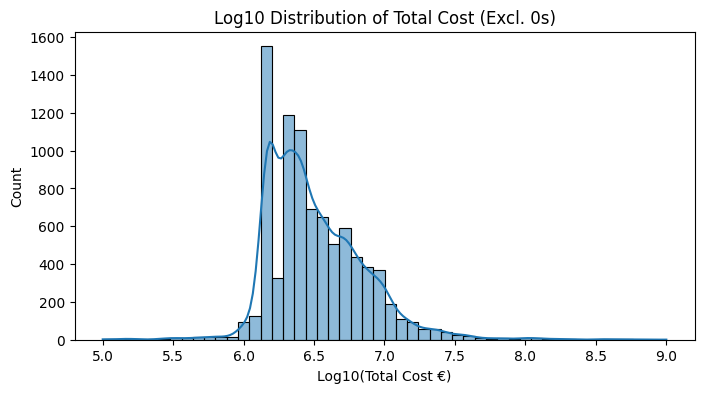

In [29]:

# Filter out zero-cost projects
project_nonzero = project_merged[project_merged["totalCost"] > 0]

plt.figure(figsize=(8, 4))
sns.histplot(np.log10(project_nonzero["totalCost"]), bins=50, kde=True)
plt.title("Log10 Distribution of Total Cost (Excl. 0s)")
plt.xlabel("Log10(Total Cost €)")
plt.show()





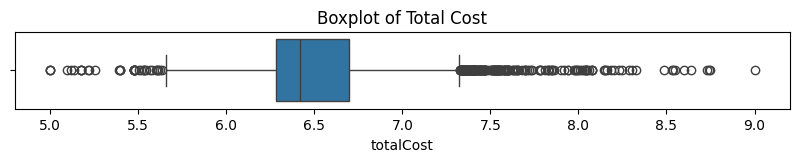

In [30]:
plt.figure(figsize=(10, 1))
sns.boxplot(x=np.log10(project_nonzero["totalCost"]))
plt.title("Boxplot of Total Cost")
plt.show()


#### Start Dates

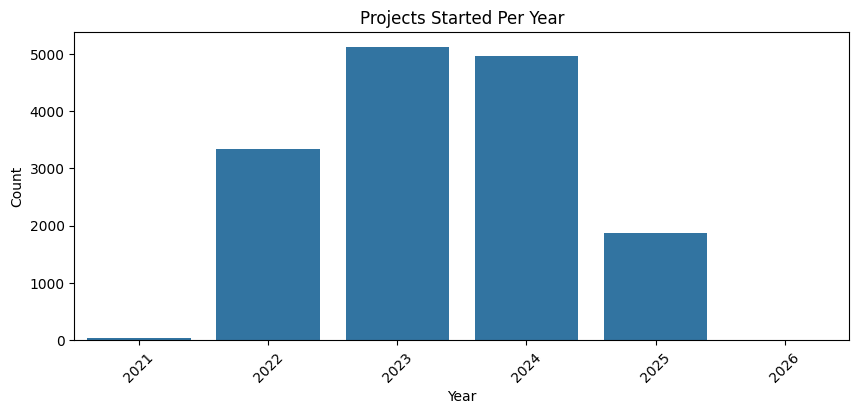

In [31]:
project_merged["startYear"] = project_merged["startDate"].dt.year

plt.figure(figsize=(10, 4))
sns.countplot(data=project_merged, x="startYear", order=sorted(project_merged["startYear"].dropna().unique()))
plt.xticks(rotation=45)
plt.title("Projects Started Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


#### Number of Organisations per Project

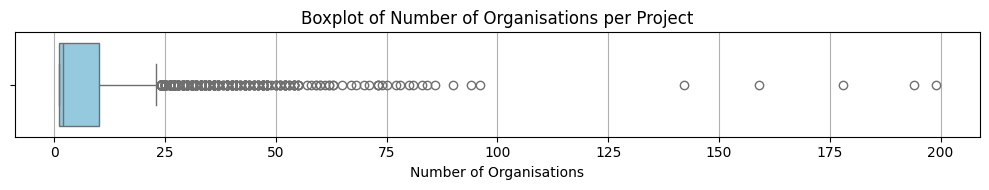

In [32]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=project_merged["n_organisations"], color="skyblue")

plt.title("Boxplot of Number of Organisations per Project")
plt.xlabel("Number of Organisations")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


a few very large collaborations (EU priority projects?), but ~50% <= 3 and the rest <=24

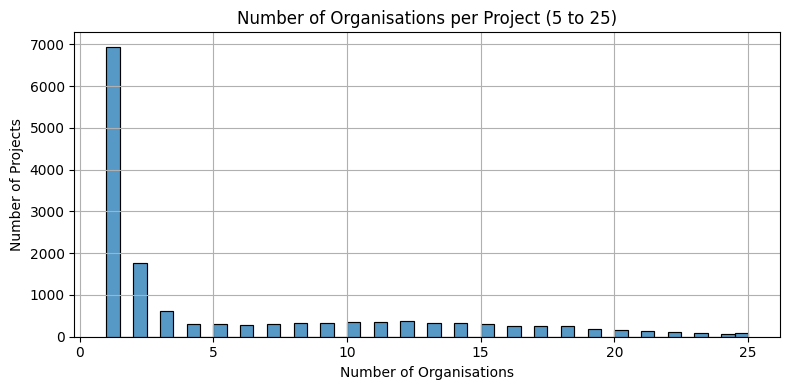

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(
    data=project_merged[project_merged["n_organisations"] <= 25],
    x="n_organisations",
    bins=48
)

plt.title("Number of Organisations per Project (5 to 25)")
plt.xlabel("Number of Organisations")
plt.ylabel("Number of Projects")
plt.grid(True)
plt.tight_layout()
plt.show()


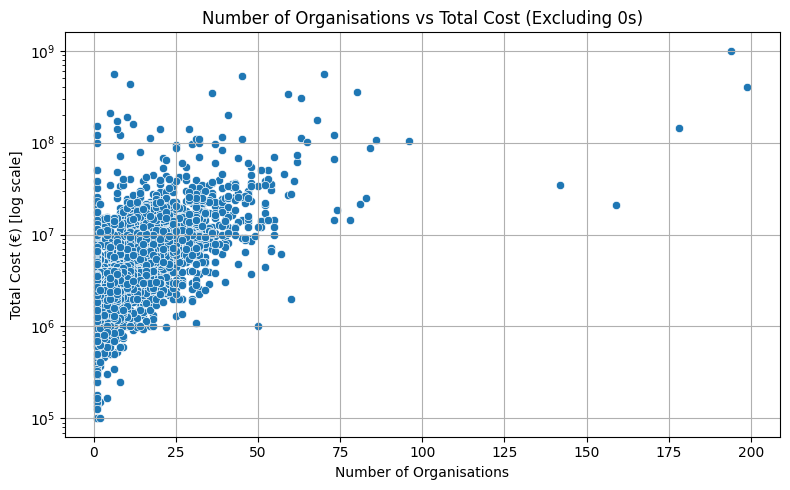

In [34]:
plt.figure(figsize=(8, 5))
subset = project_merged[project_merged["totalCost"] > 0]

sns.scatterplot(data=subset, x="n_organisations", y="totalCost")

plt.yscale("log")
plt.ylabel("Total Cost (€) [log scale]")

plt.title("Number of Organisations vs Total Cost (Excluding 0s)")
plt.xlabel("Number of Organisations")
plt.grid(True)
plt.tight_layout()
plt.show()


## Vectorise Text

### First attempt- combining objective and sciVoc topics to predict similar projects

In [37]:

model = SentenceTransformer('all-MiniLM-L6-v2')
project_vectors = model.encode(project_merged["text_for_match"], show_progress_bar=True)


Batches:   0%|          | 0/480 [00:00<?, ?it/s]

In [60]:
user_input = "meta-analysis of the impact of climate change on biodiversity"
input_vec = model.encode([user_input])  # or vectorizer.transform([user_input])

sims = cosine_similarity(input_vec, project_vectors)[0]
project["similarity"] = sims

top_matches = project.sort_values("similarity", ascending=False).head(10)


In [61]:
top_matches

,projectID,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi,similarity
8991,101098020,MetaChange,SIGNED,Biodiversity change across time and space in t...,2024-01-01,2028-12-31,2439071.0,2439071.00,HORIZON.1.1,ERC-2022-ADG,...,HORIZON,ERC-2022-ADG,ERC-2022-ADG,HORIZON-ERC,NaN,Despite connections between metacommunity leve...,2024-09-06 18:26:58,253909,10.3030/101098020,0.668864
9293,101067850,ClimRes,SIGNED,Quantifying the resilience of vertebrates to c...,2023-09-01,2025-08-31,0.0,165312.96,HORIZON.1.2,HORIZON-MSCA-2021-PF-01-01,...,HORIZON,HORIZON-MSCA-2021-PF-01,HORIZON-MSCA-2021-PF-01,HORIZON-TMA-MSCA-PF-EF,NaN,Climate change remains one of the most critica...,2022-11-16 18:02:42,242962,10.3030/101067850,0.601820
5057,101149703,DROVE,SIGNED,Demographic Responses tO Varying Environments ...,2024-09-01,2026-08-31,0.0,195914.88,HORIZON.1.2,HORIZON-MSCA-2023-PF-01-01,...,HORIZON,HORIZON-MSCA-2023-PF-01,HORIZON-MSCA-2023-PF-01,HORIZON-TMA-MSCA-PF-EF,NaN,Ongoing climate change has altered both mean a...,2024-04-18 12:38:46,262671,10.3030/101149703,0.596298
13332,101104696,THREATS,SIGNED,THREATS to biodiversity conservation: Global i...,2023-09-01,2025-08-31,0.0,230774.40,HORIZON.1.2,HORIZON-MSCA-2022-PF-01-01,...,HORIZON,HORIZON-MSCA-2022-PF-01,HORIZON-MSCA-2022-PF-01,HORIZON-TMA-MSCA-PF-EF,NaN,Renewable energy developments are essential to...,2023-07-13 10:26:55,253814,10.3030/101104696,0.587378
13885,101043548,RECODYN,SIGNED,Ecosystem recovery dynamics and their response...,2023-01-01,2027-12-31,1999315.0,1999315.00,HORIZON.1.1,ERC-2021-COG,...,HORIZON,ERC-2021-COG,ERC-2021-COG,HORIZON-ERC,NaN,Global change degrades ecosystems worldwide. T...,2024-09-06 18:28:59,242336,10.3030/101043548,0.583266
8915,101076837,FutureNature,SIGNED,Shaping functional ecosystems of the future,2023-11-01,2028-10-31,1414937.0,1414937.00,HORIZON.1.1,ERC-2022-STG,...,HORIZON,ERC-2022-STG,ERC-2022-STG,HORIZON-ERC,NaN,Accelerating climate change is moving ecosyste...,2023-07-11 15:31:35,252718,10.3030/101076837,0.577618
8241,101087409,BEFPREDICT,SIGNED,Predictive Understanding of the effects of Glo...,2024-05-01,2029-04-30,1999923.0,1999923.00,HORIZON.1.1,ERC-2022-COG,...,HORIZON,ERC-2022-COG,ERC-2022-COG,HORIZON-ERC,NaN,The observed degradation in essential ecosyste...,2023-12-18 20:19:13,258825,10.3030/101087409,0.572901
8840,101097676,BIOSHIFT,SIGNED,"Biodiversity, abrupt ecosystem shifts and rest...",2024-01-01,2028-12-31,2499351.0,2499351.00,HORIZON.1.1,ERC-2022-ADG,...,HORIZON,ERC-2022-ADG,ERC-2022-ADG,HORIZON-ERC,NaN,"Global change and desertification drivers, suc...",2023-11-21 13:25:21,258275,10.3030/101097676,0.572672
2399,101081744,RAINFOREST,SIGNED,Co-produced transformative knowledge to accele...,2022-12-01,2025-11-30,3314529.0,3314529.00,HORIZON.2.6,HORIZON-CL6-2022-BIODIV-01-08,...,HORIZON,HORIZON-CL6-2022-BIODIV-01,HORIZON-CL6-2022-BIODIV-01,HORIZON-RIA,NaN,Food and biomass production systems are among ...,2022-10-10 13:46:27,242365,10.3030/101081744,0.567491
3099,101181408,BioClima,SIGNED,Improving Monitoring for Better Integrated Cli...,2025-01-01,2028-12-31,4999437.5,4999437.50,HORIZON.2.6,HORIZON-CL6-2024-CLIMATE-01-7,...,HORIZON,HORIZON-CL6-2024-CLIMATE-01,HORIZON-CL6-2024-CLIMATE-01,HORIZON-RIA,NaN,"The BioClima project, enhanced by EU-China col...",2024-12-17 11:14:16,268086,10.3030/101181408,0.563471


## Save Processed data to csv

In [66]:
project_merged.to_csv("data_1/processed/project_merged.csv", index=False)


In [ ]:
org_unique_detailed.to_csv("data_1/processed/org_unique_detailed.csv", index=False)


In [ ]:
scivoc_summary.to_csv("data_1/processed/scivoc_summary.csv", index=False)


## Create model files (vectorise project objectives for searching later)

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

objective_texts = project_merged["objective"].fillna("") + " " + project_merged["sciVocTopics"].apply(lambda x: " ".join(x) if isinstance(x, list) else "")

project_embeddings = model.encode(objective_texts, show_progress_bar=True)

# Save embeddings
np.save("models/project_embeddings.npy", project_embeddings)

# Save project IDs for later lookup
project_ids = project_merged["projectID"].tolist()
with open("models/project_ids.pkl", "wb") as f:
    pickle.dump(project_ids, f)

# Save the model path
with open("models/embedding_model_name.txt", "w") as f:
    f.write("all-MiniLM-L6-v2")
